In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def log_post(y, yobs, sig_y):
    p = (y-yobs)**2/sig_y**2
    return p

def my_model(x, a):
    y = a*x**2
    return y    

50
[array([ 1.44, 28.09,  0.  , 28.09,  1.44]), array([ 1.2325531 , 27.85254477,  0.        , 27.85254477,  1.2325531 ]), array([ 1.04123282, 27.61609746,  0.        , 27.61609746,  1.04123282]), array([ 0.86603915, 27.38065806,  0.        , 27.38065806,  0.86603915]), array([ 0.70697209, 27.14622657,  0.        , 27.14622657,  0.70697209]), array([ 0.56403165, 26.912803  ,  0.        , 26.912803  ,  0.56403165]), array([ 0.43721783, 26.68038734,  0.        , 26.68038734,  0.43721783]), array([ 0.32653061, 26.44897959,  0.        , 26.44897959,  0.32653061]), array([ 0.23197001, 26.21857976,  0.        , 26.21857976,  0.23197001]), array([ 0.15353603, 25.98918784,  0.        , 25.98918784,  0.15353603]), array([ 0.09122865, 25.76080383,  0.        , 25.76080383,  0.09122865]), array([ 0.0450479 , 25.53342774,  0.        , 25.53342774,  0.0450479 ]), array([1.49937526e-02, 2.53070596e+01, 0.00000000e+00, 2.53070596e+01,
       1.49937526e-02]), array([1.06622241e-03, 2.50816993e+01, 0.0

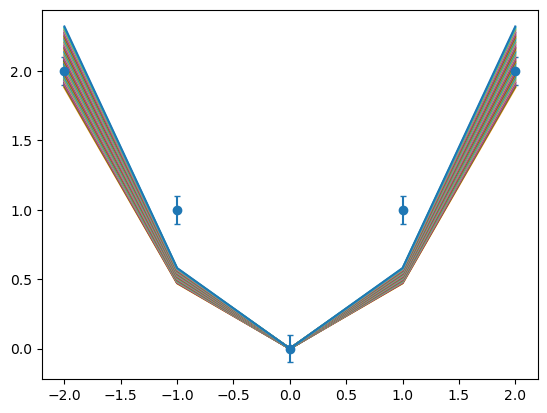

In [14]:
yobs = np.array([2, 1, 0, 1, 2])
xobs = np.array([-2, -1, 0, 1, 2])
sig_y = np.array([0.1, 0.1, 0.1, 0.1, 0.1])

plt.errorbar(xobs, yobs, yerr=sig_y, capsize=2, fmt='o')

saveposteriors = []
save_a = []

for a in np.linspace(0.47, 0.58): # This way of sampling is called grid sampling
    plt.plot(xobs, my_model(xobs, a), '-')
    post = log_post(my_model(xobs, a), yobs, sig_y)
    saveposteriors.append(post)
    save_a.append(a)

print(len(saveposteriors))
print(saveposteriors)
saveposteriors = np.array(saveposteriors)
print(saveposteriors.shape)
print(saveposteriors)


(50, 5)
(50,)
26
0.5283673469387755
[1.19974677e+01 1.11076635e+01 1.02521283e+01 9.43086214e+00
 8.64386506e+00 7.89113703e+00 7.17267805e+00 6.48848813e+00
 5.83856726e+00 5.22291545e+00 4.64153269e+00 4.09441899e+00
 3.58157434e+00 3.10299875e+00 2.65869221e+00 2.24865473e+00
 1.87288630e+00 1.53138692e+00 1.22415660e+00 9.51195335e-01
 7.12503124e-01 5.08079967e-01 3.37925864e-01 2.02040816e-01
 1.00424823e-01 3.30778842e-02 0.00000000e+00 1.19117035e-03
 3.66513953e-02 1.06380675e-01 2.10379009e-01 3.48646397e-01
 5.21182840e-01 7.27988338e-01 9.69062890e-01 1.24440650e+00
 1.55401916e+00 1.89790087e+00 2.27605165e+00 2.68847147e+00
 3.13516035e+00 3.61611828e+00 4.13134527e+00 4.68084132e+00
 5.26460641e+00 5.88264057e+00 6.53494377e+00 7.22151603e+00
 7.94235735e+00 8.69746772e+00]
[6.15979092e-06 1.49969536e-05 3.52823302e-05 8.02100178e-05
 1.76204544e-04 3.74044035e-04 7.67265202e-04 1.52084659e-03
 2.91301322e-03 5.39158728e-03 9.64290666e-03 1.66654262e-02
 2.78318468e-02 4

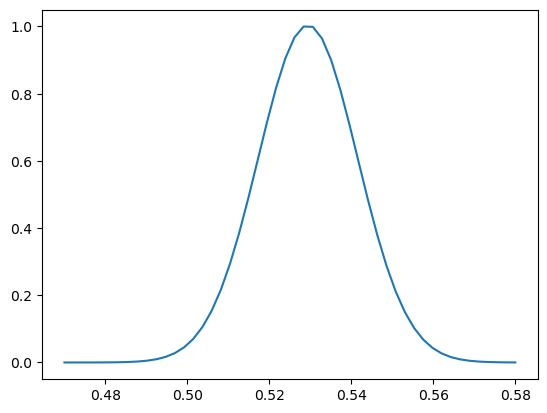

In [21]:
print(saveposteriors.shape)
lp = saveposteriors.sum(axis=1)
#plt.plot(save_a, lp)
print(lp.shape)
#print(save_a.size)
plt.plot(save_a, np.exp(-(lp-lp.min())))
#plt.plot(save_a, lp-lp.min())

x = (np.exp(-(lp-lp.min()))).max()

print(np.argmin(lp))
print(save_a[np.argmin(lp)])

print(lp - lp.min())
print(np.exp(-(lp-lp.min())))


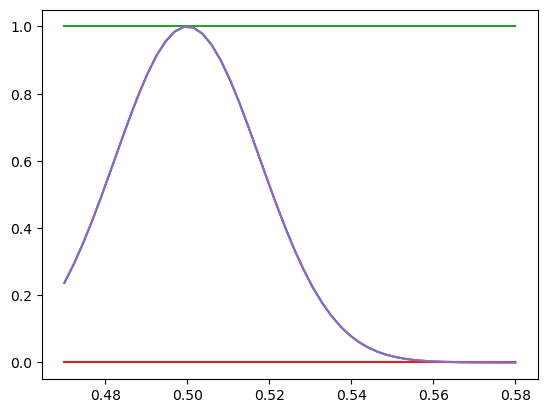

In [20]:
#plt.plot(save_a, saveposteriors)
plt.plot(save_a, np.exp(-saveposteriors - saveposteriors.min()))


(array([0, 0]), array([1, 3]))

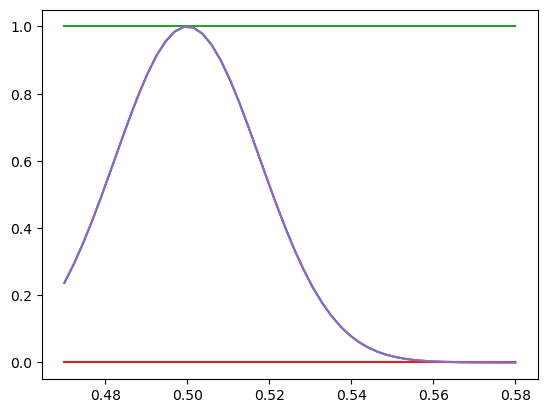

In [17]:
plt.plot(save_a, np.exp(-saveposteriors - saveposteriors.min()))
np.where(saveposteriors == saveposteriors.max())


<ErrorbarContainer object of 3 artists>

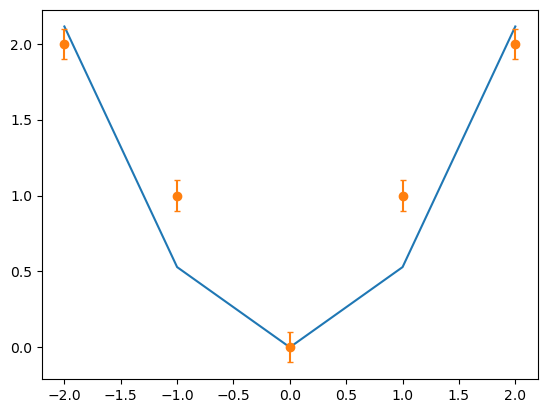

In [18]:
#plt.plot(xobs, my_model(xobs, 1), '-')
plt.plot(xobs, my_model(xobs, 0.5283673469387755), '-')

plt.errorbar(xobs, yobs, yerr=sig_y, capsize=2, fmt='o')


EMCEE example with Grid Sampling

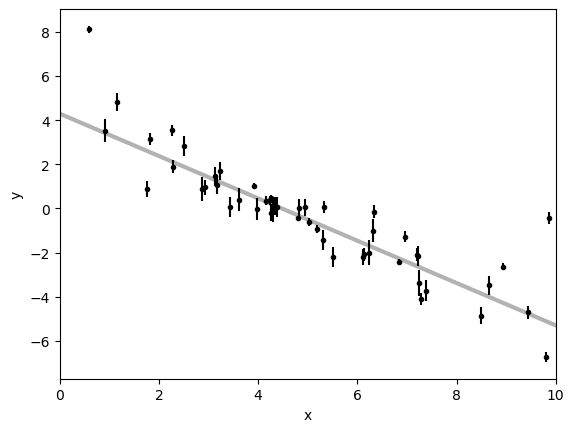

In [3]:
np.random.seed(123)

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 50
x = np.sort(10 * np.random.rand(N))
yerr = 0.1 + 0.5 * np.random.rand(N)
y = m_true * x + b_true
y += np.abs(f_true * y) * np.random.randn(N)
y += yerr * np.random.randn(N)

plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y");

In [4]:
def log_likelihood(model, y, yerr):
    return ((y - model) ** 2 / yerr ** 2)

def model1( x, m):
    model = m*x + b_true
    return model



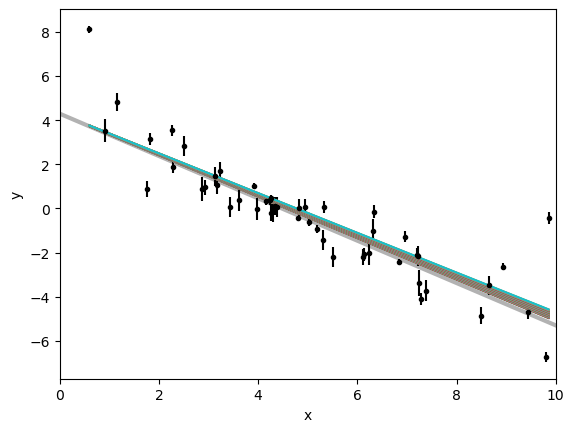

In [19]:
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y"); 

saveposteriors = []
save_a = []
save_b = []

for a in np.linspace(-0.94, -0.9): # This way of sampling is called grid sampling
    plt.plot(x, model1(x, a), '-')
    post = log_likelihood(model1(x, a), y, yerr)
    saveposteriors.append(post)
    save_a.append(a)

saveposteriors = np.array(saveposteriors)


-0.9171428571428571

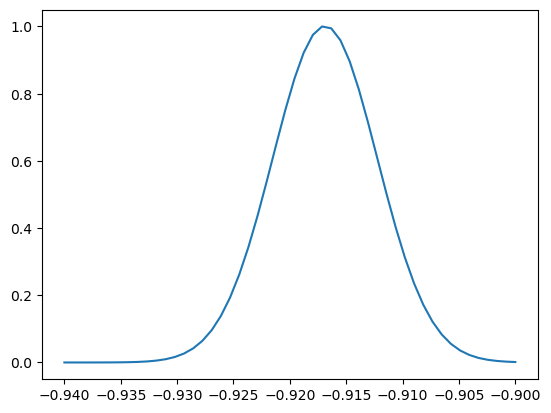

In [21]:
saveposteriors.shape
lp = saveposteriors.sum(axis=1)
#plt.plot(save_a, lp)
plt.plot(save_a, np.exp(-(lp-lp.min())))

#x = (np.exp(-(lp-lp.min()))).max()

np.argmin(lp)
save_a[np.argmin(lp)]

In [76]:
max_value = (np.exp(-saveposteriors - saveposteriors.min())).max()

(np.exp(-saveposteriors - saveposteriors.min())).type()

for i in np.exp(-saveposteriors - saveposteriors.min()):
    if np.exp(-saveposteriors - saveposteriors.min())[i] == max_value:
        print(i)


AttributeError: 'numpy.ndarray' object has no attribute 'type'

In [59]:
a = save_a[46]
a

-0.12244897959183687

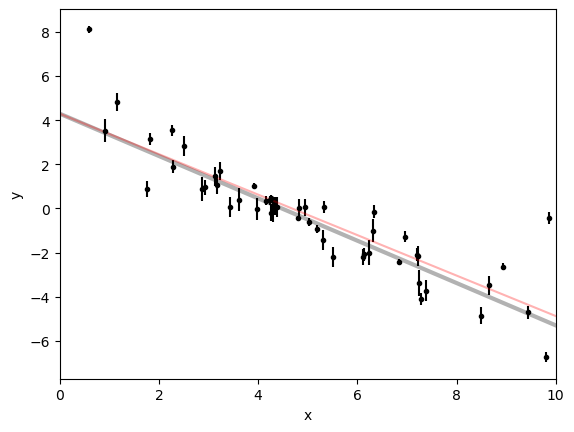

In [22]:
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
x0 = np.linspace(0, 10, 500)
plt.plot(x0, m_true * x0 + b_true, "k", alpha=0.3, lw=3)
plt.xlim(0, 10)
plt.xlabel("x")
plt.ylabel("y")

plt.plot(x0, -0.9171428571428571 * x0 + b_true, "r", alpha=0.3)


## Fitting 2 Parameters

In [50]:
def log_post(z, zobs, sig_z):
    p = (z-zobs)**2/sig_z**2
    return p

def my_model(x, a, b):
    z = a*x + b
    return z    

ValueError: operands could not be broadcast together with shapes (50,) (6,) 

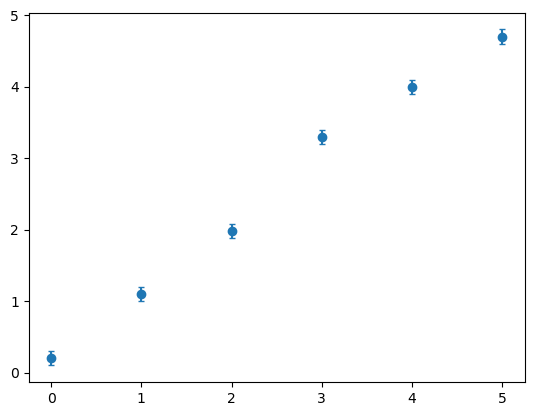

In [51]:
yobs = np.array([0.2, 1.1, 1.98, 3.3, 4, 4.7])
xobs = np.array([0, 1, 2, 3, 4, 5])


sig_y = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1])


plt.errorbar(xobs, yobs, yerr=sig_y, capsize=2, fmt='o')

saveposteriors = []
save_a = []
save_b = []

(m, n) = (50, 50)
a = np.linspace(0.75, 1, m)
b = np.linspace(0.8, 1.5, n)

a, b = np.meshgrid(a, b)

saveposteriors = np.zeros((m, n))


for i in a:
    for j in b: 
        plt.plot(xobs, my_model(xobs, i, j), '-')
        post = log_post(my_model(xobs, i, j), yobs, sig_y)
        saveposteriors[m][n]=post#.sum())
        save_b.append(b)
    save_a.append(a)

#print(len(saveposteriors))
#print(saveposteriors)
#saveposteriors = np.array(saveposteriors)
print(saveposteriors.shape)
#print(saveposteriors)


ValueError: x and y must have same first dimension, but have shapes (50,) and (2500, 6)

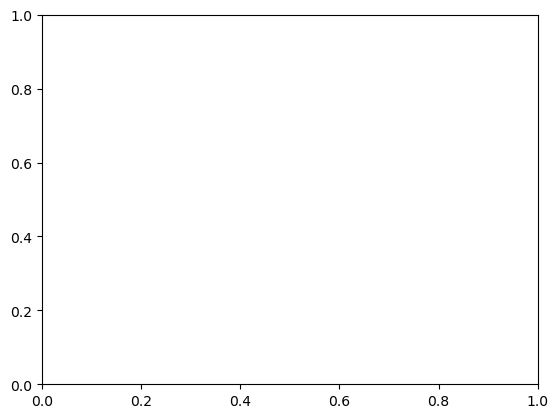

In [43]:
#print(saveposteriors.shape)
#lp = saveposteriors.sum(axis=1)
#plt.plot(save_a, lp)
#print(lp.shape)
#print(save_a.size)
plt.plot(save_a, np.exp(-(saveposteriors-saveposteriors.min())))

x = (np.exp(-(lp-lp.min()))).max()

np.argmin(lp)
save_a[np.argmin(lp)]
